# **Imports** - Run All

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statistics import mean
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **View raw code** - Optional


In [ ]:
df_ratings = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/COMP20008-A2-Data-Files/BX-Ratings.csv')
df_users = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/COMP20008-A2-Data-Files/BX-Users.csv')
df_books = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/COMP20008-A2-Data-Files/BX-Books.csv')

In [ ]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
3,0440234743,The Testament,John Grisham,1999,Dell
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume


In [ ]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7


In [ ]:
df_users.head()

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,"canada""",NaN
1,9,germantown,tennessee,"usa""",NaN
2,16,albuquerque,new mexico,"usa""",NaN
3,17,chesapeake,virginia,"usa""",NaN
4,19,weston,,NaN,"14"""


# **Data Pre-processing**

## **Clean data** - Results in .csv exports (Optional)

In [ ]:
## Users
df_users = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/COMP20008-A2-Data-Files/BX-Users.csv')
print("Number of initial users:", len(df_users))

#Remove users with no data for country or age
df_users = df_users.dropna(subset=['User-Country', 'User-Age'])
print("Removed NaNs:", len(df_users))

# Remove the " occasionally found at the end of a country name
df_users["User-Country"] = df_users["User-Country"].str.rstrip('"')
df_users["User-Age"] = df_users["User-Age"].astype("str").str.rstrip('"')

# Convert into correct datatype
df_users["User-Age"] = df_users["User-Age"].astype(float).astype('Int64')

# Remove users with unreasonable ages
df_users = df_users[df_users['User-Age'].between(12, 101)]
print("Removed unreasonable ages:", len(df_users))

# Only retain users from countries that make up at least 1% of the dataset
df_users = df_users.groupby("User-Country").filter(lambda x: len(x)/132 > 0.01)
print("Removed minority countries:", len(df_users))

print("Number of final users:", len(df_users))
df_users.head(10)

Number of initial users: 48299
Removed NaNs: 28678
Removed unreasonable ages: 28427
Removed minority countries: 28372
Number of final users: 28372


,User-ID,User-City,User-State,User-Country,User-Age
8,42,appleton,wisconsin,usa,17
9,44,black mountain,north carolina,usa,51
10,51,renton,washington,usa,34
12,56,cheyenne,wyoming,usa,24
15,75,long beach,california,usa,37
16,78,oakland,california,usa,18
19,85,london,england,united kingdom,41
21,99,franktown,colorado,usa,42
23,114,ligonier,pennsylvania,usa,57
24,125,lansing,michigan,usa,49


In [ ]:
# Export
df_users.to_csv('/content/drive/MyDrive/COMP20008 Assignment 2/Cleaned Data/Users-Cleaned.csv', index=False)

In [ ]:
## Users
df_books = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/COMP20008-A2-Data-Files/BX-Books.csv')
print("Number of initial books:", len(df_books))

#Remove unreasonable years of publication
df_books = df_books.loc[df_books['Year-Of-Publication'] > 1900]
df_books = df_books.loc[df_books['Year-Of-Publication'] < 2025]

print("Number of final books:", len(df_books))
df_books.head(10)

Number of initial books: 18185
Number of final books: 17868


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
3,0440234743,The Testament,John Grisham,1999,Dell
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
5,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press
6,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters & Small Ltd
7,0971880107,Wild Animus,Rich Shapero,2004,Too Far
8,0345402871,Airframe,Michael Crichton,1997,Ballantine Books
9,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books


In [ ]:
# Export
df_books.to_csv('/content/drive/MyDrive/COMP20008 Assignment 2/Cleaned Data/Books-Cleaned.csv', index=False)

In [ ]:
# Function to check if a string contains only alphabetic characters
def is_alpha(text):
    return str(text).isalpha()

# Function to check if a string represents an integer
def is_integer(text):
    try:
        int(text)
        return True
    except ValueError:
        return False

merged_data = pd.merge(df_ratings, df_books, on='ISBN', how='inner')
merged_data = pd.merge(merged_data, df_users, on='User-ID', how='inner')

# cleaned_data.head(10)
print(len(merged_data))
cleaned_data = merged_data
merged_data.head(10)

136915


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-City,User-State,User-Country,User-Age
0,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,houston,arkansas,usa,37
1,16877,034539657X,7,Dark Rivers of the Heart,Dean R. Koontz,1995,Ballantine Books,houston,arkansas,usa,37
2,16877,0743211383,3,Dreamcatcher,Stephen King,2001,Scribner,houston,arkansas,usa,37
3,16877,0786868716,10,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,houston,arkansas,usa,37
4,16877,0449242773,10,Walk Across America,Jenkins,1982,Not Avail,houston,arkansas,usa,37
5,16877,0553225855,8,Minds of Billy Milligan,Daniel Keyes,1982,Bantam Books,houston,arkansas,usa,37
6,16877,055325748X,8,Zen and the art of Motorcycle Maintenance,Robert Pirsig,1984,Bantam Books,houston,arkansas,usa,37
7,16877,0670030031,10,Lake Wobegon: Summer 1956,Garrison Keillor,2001,Viking Books,houston,arkansas,usa,37
8,21340,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,holton,kansas,usa,45
9,21340,0316153990,7,Blood Work (Blood Work),Michael Connelly,1998,"Little, Brown",holton,kansas,usa,45


In [ ]:
# Export
cleaned_data.to_csv('/content/drive/MyDrive/COMP20008 Assignment 2/Cleaned Data/Data-Cleaned.csv', index=False)

# **CSV Imports**

In [ ]:
# Import previously cleaned data
df = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/Cleaned Data/Data-Cleaned.csv')
print(len(df))

136915


# Trends and Data Analysis

## User Demographic Analysis

<Axes: xlabel='User-Age', ylabel='Density'>

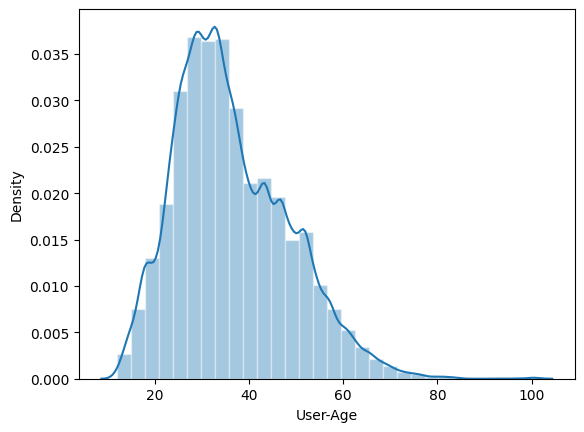

In [ ]:
# Distribution of User Age
sns.histplot(
    df['User-Age'], kde=True, bins=30,
    stat='density', kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

In [ ]:
# Percentage of users in each age group
df['User-Age'].value_counts(bins =[13,18,22,30,40,50,60,70,80,90,100], normalize=True).sort_index()

User-Age
(12.999, 18.0]    0.044939
(18.0, 22.0]      0.053983
(22.0, 30.0]      0.263512
(30.0, 40.0]      0.310290
(40.0, 50.0]      0.185491
(50.0, 60.0]      0.104865
(60.0, 70.0]      0.029354
(70.0, 80.0]      0.005308
(80.0, 90.0]      0.000736
(90.0, 100.0]     0.000274
Name: proportion, dtype: float64

In [ ]:
# 61% of users are between 20 and 40 years old
df['User-Age'].value_counts(bins =[20,40,60], normalize=True).sort_index()

User-Age
(19.999, 40.0]    0.616751
(40.0, 60.0]      0.290356
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x79126dd701c0>,
 [Text(-0.8900032182156992, 0.6464474236669977, ' usa'),
  Text(0.6486013900085369, -0.8884347116580903, ' canada'),
  Text(0.9481690496968808, -0.5576517310982851, ' united kingdom'),
  Text(1.029255928714502, -0.38811368592984236, ' germany'),
  Text(1.0710401942882326, -0.2507446952958834, ' spain'),
  Text(1.0911289304657914, -0.13941899834878396, ' australia'),
  Text(1.0992034623833642, -0.041853892106040645, ' portugal')],
 [Text(-0.48545630084492675, 0.35260768563654415, '80.0%\n(103751)'),
  Text(0.35378257636829286, -0.48460075181350376, '10.1%\n(13052)'),
  Text(0.5171831180164804, -0.3041736715081555, '2.9%\n(3812)'),
  Text(0.5614123247533647, -0.21169837414355036, '2.5%\n(3249)'),
  Text(0.5842037423390358, -0.13676983379775456, '1.7%\n(2143)'),
  Text(0.5951612347995225, -0.07604672637206397, '1.6%\n(2104)'),
  Text(0.5995655249363804, -0.02282939569420399, '1.2%\n(1571)')])

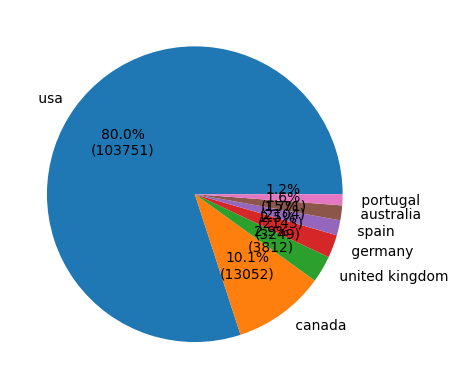

In [ ]:
# Potential for pie chart representing user country of origin
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
df_temp = df.groupby("User-Country").filter(lambda x: len(x)/132 > 10)
s = df_temp['User-Country'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

## Book Publication Analysis

In [ ]:
# Distribution of the number of books published per year
sns.histplot(
    df['Year-Of-Publication'], kde=True, bins=30,
    stat='density', kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

NameError: name 'sns' is not defined

# Further Analysis

In [ ]:
# Create a dataframe that describes each book and the ratings they received.
merged = pd.merge(df_ratings, df_users, on='User-ID', how='inner')
merged = merged.groupby(['ISBN']).aggregate(lambda x: tuple(x))
df2 = pd.merge(df_books, merged, on='ISBN', how='inner')
df2['Count'] = df2['Book-Rating'].apply(len)
df2['Mean'] = df2['Book-Rating'].apply(mean)
df2["Years-In-Publication"] = df2["Year-Of-Publication"].apply(lambda x: 2024-x)
df2["Reviews-Per-Year"] = df2["Count"]/df2["Years-In-Publication"]
print(len(df2))
df2.head()

17781


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-ID,Book-Rating,User-City,User-State,User-Country,User-Age,Count,Mean,Years-In-Publication,Reviews-Per-Year
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"(67544, 219008, 263325)","(8, 7, 6)","(toronto, halifax, fredericton)","( ontario, nova scotia, new brunswick)","( canada, canada, canada)","(30, 60, 27)",3,7.000000,23,0.130435
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"(35704, 110912, 157969, 192665, 197659)","(6, 10, 8, 8, 9)","(kansas city, milpitas, denver, vacaville, ind...","( missouri, california, colorado, californi...","( usa, usa, usa, usa, usa)","(53, 36, 30, 47, 49)",5,8.200000,25,0.200000
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,"(29526, 46398, 67958, 230522, 238557, 252921, ...","(9, 9, 10, 7, 10, 8, 5)","(knoxville, san antonio, idaho falls, colorado...","( tennessee, texas, idaho, colorado, selan...","( usa, usa, usa, usa, malaysia, usa, usa)","(26, 37, 39, 52, 21, 22, 34)",7,8.285714,33,0.212121
3,0440234743,The Testament,John Grisham,1999,Dell,"(7346, 7352, 11224, 12923, 13552, 20801, 21264...","(9, 8, 6, 10, 8, 8, 5, 8, 10, 10, 8, 8, 9, 10,...","(sunnyvale, houston, tumwater, louisville, cor...","( california, texas, washington, kentucky, ...","( usa, usa, usa, usa, usa, brazil, usa, ...","(49, 53, 51, 39, 32, 29, 31, 56, 74, 34, 68, 5...",91,7.659341,25,3.640000
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,"(3373, 8570, 12863, 14449, 20265, 22625, 27624...","(10, 8, 9, 5, 8, 9, 8, 9, 8, 10, 2, 2, 5, 9, 1...","(elk grove, rochester, london, saskatoon, tamp...","( california, new york, england, saskatchew...","( usa, usa, united kingdom, canada, usa, ...","(30, 23, 29, 72, 29, 54, 54, 36, 44, 39, 25, 2...",53,7.811321,30,1.766667


## Rank the most popular books via Bayesian Average

In [ ]:
m = df2['Count'].quantile(0.90)
C = df2['Mean'].mean()
print(m, C)

# Bayesian Average
def weighted_rating(d, m=m, C=C):
	v = d['Count']
	R = d['Mean']
	return (v/(v+m)*R)+(m/(m+v)*C)

df2['Score']=df2.apply(weighted_rating, axis=1)

top = df2.loc[df2['Count']>=m]
print(len(top))

# Top 10 most popular books according to this ranking
top.sort_values(by='Score', ascending=False)['Book-Title'].head(10)

14.0 7.749220297073842
1983


2039     The Return of the King (The Lord of the Rings,...
2569          Harry Potter and the Goblet of Fire (Book 4)
1877     Harry Potter and the Prisoner of Azkaban (Book 3)
422         The Two Towers (The Lord of the Rings, Part 2)
2602     Harry Potter and the Order of the Phoenix (Boo...
1416        Harry Potter and the Sorcerer's Stone (Book 1)
15501    Harry Potter and the Chamber of Secrets Postca...
1117     Harry Potter and the Sorcerer's Stone (Harry P...
12                                   To Kill a Mockingbird
2969     Harry Potter and the Prisoner of Azkaban (Book 3)
Name: Book-Title, dtype: object

ISBN                                                           0345339738
Book-Title              The Return of the King (The Lord of the Rings,...
Book-Author                                                J.R.R. TOLKIEN
Year-Of-Publication                                                  1986
Book-Publisher                                                    Del Rey
User-ID                 (12272, 17725, 20250, 31556, 32244, 52350, 548...
Book-Rating             (10, 9, 10, 9, 10, 9, 10, 10, 10, 9, 10, 10, 1...
User-City               (ploiesti, mt. sinai, moreno valley, chula vis...
User-State              ( prahova,  new york,  california,  california...
User-Country            ( romania,  usa,  usa,  usa,  usa,  portugal, ...
User-Age                (18, 20, 36, 51, 30, 31, 35, 24, 38, 36, 39, 4...
Count                                                                  61
Mean                                                              9.57377
Years-In-Publication                  

<Axes: ylabel='Density'>

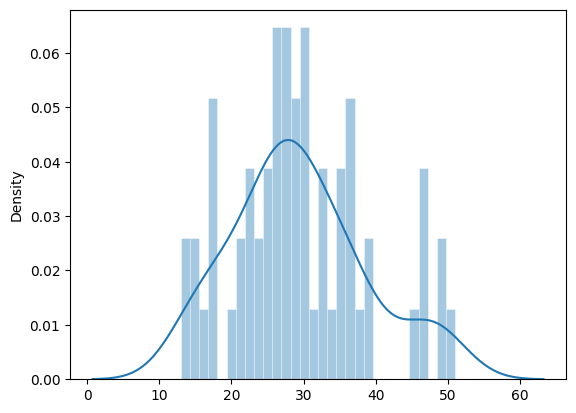

In [ ]:
# Graph distribution of user ages of a given book
print(top.sort_values('Score', ascending=False).iloc[0])
sns.histplot(
    top.sort_values('Score', ascending=False).iloc[0]['User-Age'], kde=True, bins=30,
    stat='density', kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

In [ ]:
# Attempt at correlation matrix -> needs to be continuous data?
top[['Count','Mean','Score','Year-Of-Publication']].corr()

,Count,Mean,Score,Year-Of-Publication
Count,1.000000,0.034347,0.067865,0.056407
Mean,0.034347,1.000000,0.982274,-0.203813
Score,0.067865,0.982274,1.000000,-0.196339
Year-Of-Publication,0.056407,-0.203813,-0.196339,1.000000


In [ ]:
# The authors with the most books represented in the top rankings
top['Book-Author'].value_counts().head(10)

Book-Author
Stephen King          82
Nora Roberts          60
James Patterson       36
Dean R. Koontz        32
Mary Higgins Clark    28
Anne Rice             21
John Grisham          20
Sue Grafton           20
Tom Clancy            20
Janet Evanovich       19
Name: count, dtype: int64

In [ ]:
df2.sort_values(by='Adjusted-Mean', ascending=False)['Book-Title'].head(10)

## Top scores via Wilson Uncertainty

In [ ]:
import scipy.stats as st
import numpy as np

def wilson_lower_bound(average_rating, n, confidence=0.95):
    """Weighs down ratings with fewer review counts due to uncertainty"""
    if n == 0:
        return 0
    # Calculate Z-score, default 1.96
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    x_hat = (average_rating - 1) / 9
    # Wilson lower bound formula
    wlb = (
        x_hat + z*z/(2*n) - z * np.sqrt((x_hat *(1-x_hat)+z*z/(4*n))/n))/(1+z*z/n)
    # Added 1 since minimum rating is 1
    return 1 + (9 * wlb)

def adjust_average(X):
    """Returns a new column with WLB-adjusted average rating scores"""
    X = X[:]
    adjusted_averages = []
    for i in range(len(X)):
        avg = X['Mean'].iloc[i]
        total = X['Count'].iloc[i]
        adjusted_averages.append(wilson_lower_bound(avg, total))
    X['Adjusted-Mean'] = adjusted_averages
    return X

df2 = adjust_average(df2)
df2.sort_values(by='Adjusted-Mean', ascending=True).head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-ID,Book-Rating,User-City,User-State,User-Country,User-Age,Count,Mean,Years-In-Publication,Reviews-Per-Year,Score,Adjusted-Mean
15885,1552781631,The Internet Bride,Gregory Ward,2000,McArthur Publishing,"(122901,)","(1,)","(newburgh,)","( indiana,)","( usa,)","(30,)",1,1.0,24,0.041667,7.299272,1.000000
17108,345321224X,Liegen lernen.,Frank Goosen,2002,Heyne,"(81128,)","(2,)","(düsseldorf,)","( nordrhein-westfalen,)","( germany,)","(44,)",1,2.0,22,0.045455,7.365939,1.027442
13180,006095647X,"Endangered Pleasures: In Defense of Naps, Baco...",Barbara Holland,2000,Perennial,"(258938,)","(2,)","(los angeles,)","( california,)","( usa,)","(27,)",1,2.0,24,0.041667,7.365939,1.027442
14456,0671026283,Visitors (Buffy the Vampire Slayer),Laura Anne Gilman,1999,Simon Spotlight Entertainment,"(227771,)","(2,)","(savion,)","( n/a,)","( israel,)","(19,)",1,2.0,25,0.040000,7.365939,1.027442
13430,0380978725,Blackberry Wine: A Novel,Joanne Harris,2000,William Morrow & Company,"(180915,)","(2,)","(sofia,)","( n/a,)","( bulgaria,)","(35,)",1,2.0,24,0.041667,7.365939,1.027442


In [ ]:
top2 = df2.loc[df2['Count']>=m]
print(len(top))
# Top 10 most popular books according to this ranking
top2.sort_values(by='Adjusted-Mean', ascending=False)['Book-Title'].head(10)

1983


2039    The Return of the King (The Lord of the Rings,...
2569         Harry Potter and the Goblet of Fire (Book 4)
1877    Harry Potter and the Prisoner of Azkaban (Book 3)
2602    Harry Potter and the Order of the Phoenix (Boo...
1117    Harry Potter and the Sorcerer's Stone (Harry P...
12                                  To Kill a Mockingbird
1416       Harry Potter and the Sorcerer's Stone (Book 1)
422        The Two Towers (The Lord of the Rings, Part 2)
2969    Harry Potter and the Prisoner of Azkaban (Book 3)
834     The Fellowship of the Ring (The Lord of the Ri...
Name: Book-Title, dtype: object

In [1]:
# The authors with the most books represented in the top rankings
top2['Book-Author'].value_counts().head(10)

NameError: name 'top2' is not defined

## Other

In [ ]:
# Restrict the dataframe further by only taking those in the IQR of number and average of reviews
q75 = df2['Mean'].quantile(0.75)
q25 = df2['Mean'].quantile(0.25)
iqr = q75 - q25
upper_limit = q75 + 1.5*iqr
lower_limit = q25-1.5*iqr

df3 = df2[(df2["Mean"]<= upper_limit) &(df2["Mean"]>= lower_limit)]

q75 = df3['Count'].quantile(0.75)
q25 = df3['Count'].quantile(0.25)
iqr = q75 - q25
upper_limit = q75 + 1.5*iqr
lower_limit = q25-1.5*iqr

df3 = df3[(df3["Count"]<= upper_limit) &(df3["Count"]>= lower_limit)]

df3.reset_index(drop= True, inplace = True)

print(len(df3))
df3.head()

15834


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-ID,Book-Rating,User-City,User-State,User-Country,User-Age,Count,Mean,Years-In-Publication,Reviews-Per-Year,Score,Adjusted-Mean
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"(67544, 219008, 263325)","(8, 7, 6)","(toronto, halifax, fredericton)","( ontario, nova scotia, new brunswick)","( canada, canada, canada)","(30, 60, 27)",3,7.000000,23,0.130435,7.617005,2.868936
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"(35704, 110912, 157969, 192665, 197659)","(6, 10, 8, 8, 9)","(kansas city, milpitas, denver, vacaville, ind...","( missouri, california, colorado, californi...","( usa, usa, usa, usa, usa)","(53, 36, 30, 47, 49)",5,8.200000,25,0.200000,7.867847,4.379812
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,"(29526, 46398, 67958, 230522, 238557, 252921, ...","(9, 9, 10, 7, 10, 8, 5)","(knoxville, san antonio, idaho falls, colorado...","( tennessee, texas, idaho, colorado, selan...","( usa, usa, usa, usa, malaysia, usa, usa)","(26, 37, 39, 52, 21, 22, 34)",7,8.285714,33,0.212121,7.928052,4.974902
5,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,"(7913, 58516, 79089, 98758, 126604, 159506, 17...","(6, 9, 6, 9, 10, 7, 8, 10, 10)","(mission hills, rocky river, nickerson, calgar...","( california, ohio, kansas, alberta, massa...","( usa, usa, usa, canada, usa, usa, usa, ...","(43, 30, 29, 25, 27, 28, 29, 33, 16)",9,8.333333,25,0.360000,7.977786,5.394200
6,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters & Small Ltd,"(6366, 131126, 136633, 156502, 254982)","(7, 10, 9, 10, 10)","(madrid, barcelona, burgos, zaragoza, san seba...","( madrid, catalunya, burgos, aragón, guipu...","( spain, spain, spain, spain, spain)","(20, 31, 32, 33, 28)",5,9.200000,23,0.217391,8.131004,5.261206


# Plots

Text(0, 0.5, 'Bayesian average rating')

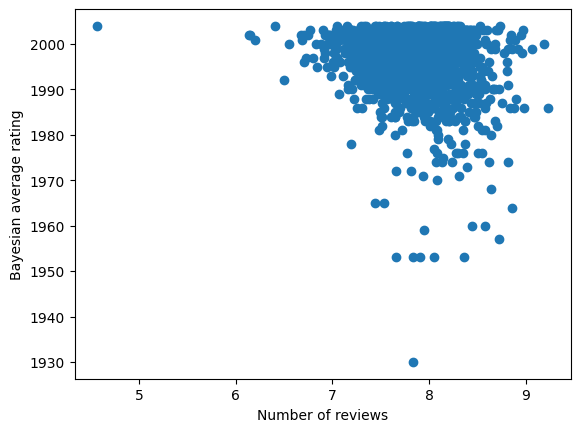

In [ ]:
plt.scatter(top['Score'], top['Year-Of-Publication'])
plt.xlabel("Number of reviews")
plt.ylabel("Bayesian average rating")

Text(0, 0.5, 'Bayesian average rating')

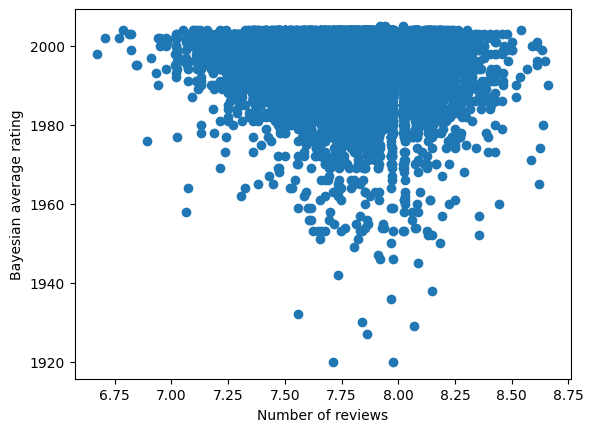

In [ ]:
plt.scatter(df3['Score'], df3['Year-Of-Publication'])
plt.xlabel("Number of reviews")
plt.ylabel("Bayesian average rating")

Text(0, 0.5, 'Mean rating')

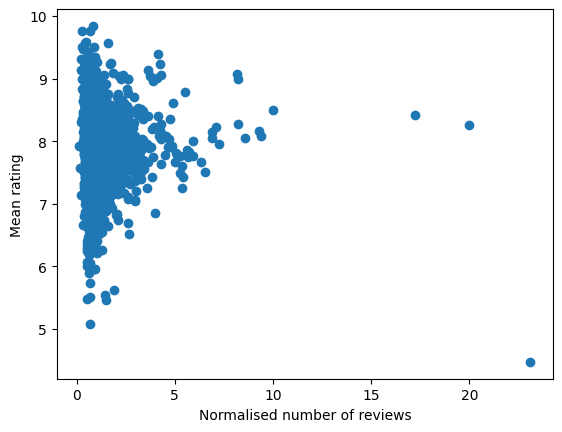

In [ ]:
plt.scatter(top["Reviews-Per-Year"], top['Mean'])
plt.xlabel("Normalised number of reviews")
plt.ylabel("Mean rating")

Text(0, 0.5, 'Mean rating')

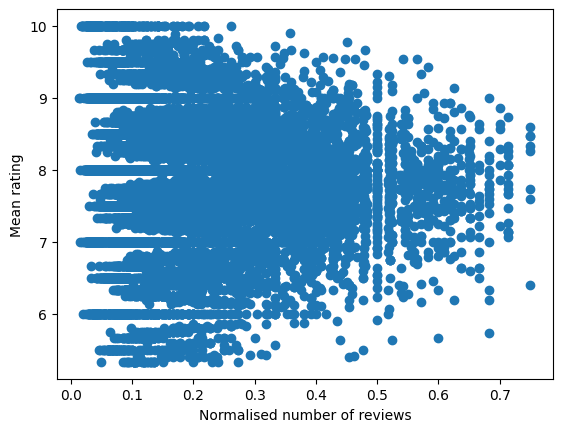

In [ ]:
plt.scatter(df3["Reviews-Per-Year"], df3['Mean'])
plt.xlabel("Normalised number of reviews")
plt.ylabel("Mean rating")

Text(0, 0.5, 'Mean rating')

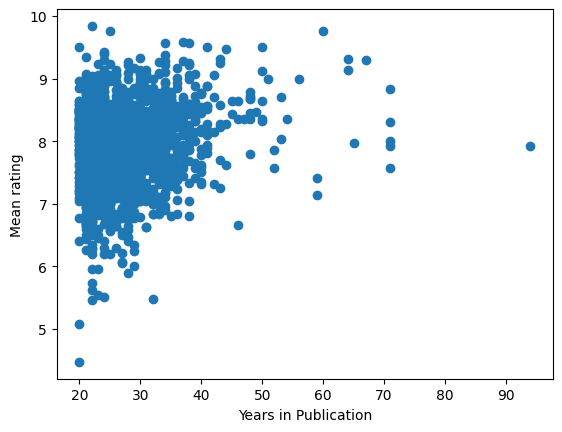

In [ ]:
plt.scatter(top["Years-In-Publication"], top['Mean'])
plt.xlabel("Years in Publication")
plt.ylabel("Mean rating")

Text(0, 0.5, 'Mean rating')

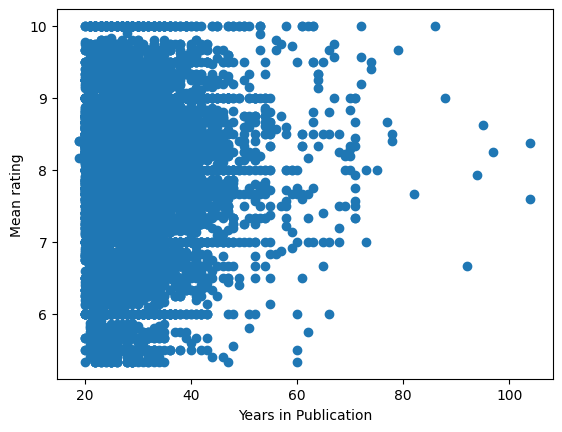

In [ ]:
plt.scatter(df3["Years-In-Publication"], df3['Mean'])
plt.xlabel("Years in Publication")
plt.ylabel("Mean rating")

Text(0, 0.5, 'WLB-Adjusted Mean rating')

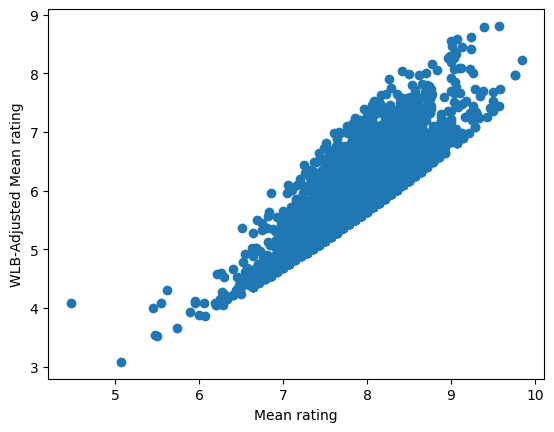

In [ ]:
plt.scatter(top2["Mean"], top2['Adjusted-Mean'])
plt.xlabel("Mean rating")
plt.ylabel("WLB-Adjusted Mean rating")

Text(0, 0.5, 'Years-In-Publication')

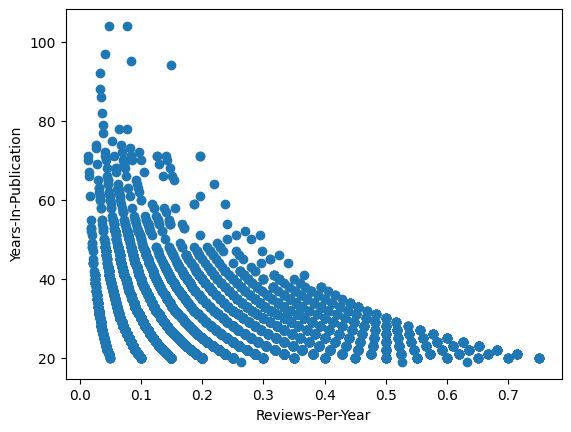

In [ ]:
plt.scatter(df3["Reviews-Per-Year"], df3['Years-In-Publication'])
plt.xlabel("Reviews-Per-Year")
plt.ylabel("Years-In-Publication")

Text(0, 0.5, 'WLB-Adjusted Mean rating')

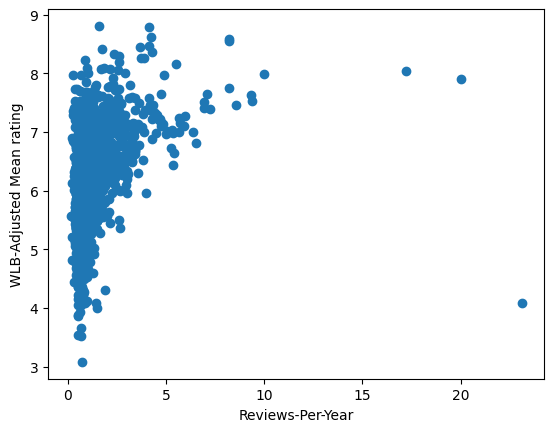

In [ ]:
plt.scatter(top2["Reviews-Per-Year"], top2['Adjusted-Mean'])
plt.xlabel("Reviews-Per-Year")
plt.ylabel("WLB-Adjusted Mean rating")

In [ ]:
from scipy import stats

print(f"R-squared: {stats.linregress(df3['Years-In-Publication'], df3['Mean']).rvalue**2:.6f}")
print(f"R-squared: {stats.linregress(df3['Reviews-Per-Year'], df3['Mean']).rvalue**2:.6f}")
print(f"R-squared: {stats.linregress(df3['Count'], df3['Mean']).rvalue**2:.6f}")

print(f"R-squared: {stats.linregress(df3['Years-In-Publication'], df3['Score']).rvalue**2:.6f}")
print(f"R-squared: {stats.linregress(df3['Reviews-Per-Year'], df3['Score']).rvalue**2:.6f}")

R-squared: 0.009129
R-squared: 0.001751
R-squared: 0.000199
R-squared: 0.011221
R-squared: 0.000293


# Restricting dataframe to only reviews left by users between 20 - 40 years old

In [ ]:
temp = df_users[df_users['User-Age'].between(20, 40)]
print(len(temp))
temp.head()

16168


,User-ID,User-City,User-State,User-Country,User-Age
10,51,renton,washington,usa,34
12,56,cheyenne,wyoming,usa,24
15,75,long beach,california,usa,37
28,178,rexford,new york,usa,28
30,202,ottawa,ontario,canada,28


In [ ]:
merged = pd.merge(df_ratings, df_users[df_users['User-Age'].between(20, 40)], on='User-ID', how='inner')
merged = merged.groupby(['ISBN']).aggregate(lambda x: tuple(x))
df4 = pd.merge(df_books, merged, on='ISBN', how='inner')
df4['Count'] = df4['Book-Rating'].apply(len)
df4['Mean'] = df4['Book-Rating'].apply(mean)
df4["Years-In-Publication"] = df4["Year-Of-Publication"].apply(lambda x: 2024-x)
df4["Reviews-Per-Year"] = df4["Count"]/df4["Years-In-Publication"]
print(len(df4))
df4.sort_values(by='Count', ascending=False).head()

16471


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-ID,Book-Rating,User-City,User-State,User-Country,User-Age,Count,Mean,Years-In-Publication,Reviews-Per-Year
216,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown","(638, 2854, 3346, 4802, 5049, 7424, 8253, 8801...","(10, 7, 9, 9, 8, 7, 10, 10, 8, 7, 8, 9, 7, 9, ...","(san diego, deptford, tehran, london, inver gr...","( california, new jersey, tehran, england, ...","( usa, usa, iran, united kingdom, usa, us...","(20, 36, 20, 28, 32, 32, 26, 24, 27, 29, 24, 2...",263,8.281369,22,11.954545
7,0971880107,Wild Animus,Rich Shapero,2004,Too Far,"(278176, 899, 1435, 1733, 2411, 3032, 4784, 64...","(9, 2, 5, 1, 3, 1, 2, 4, 2, 1, 7, 3, 1, 2, 7, ...","(medan, bielefeld, st. louis, independence, la...","( su, nordrhein-westfalen, missouri, west v...","( indonesia, germany, usa, usa, usa, aust...","(21, 23, 36, 30, 37, 40, 21, 30, 23, 29, 37, 2...",259,4.142857,20,12.950000
390,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,"(276925, 638, 882, 1211, 2179, 4098, 5722, 653...","(8, 10, 10, 9, 10, 10, 7, 10, 10, 9, 9, 10, 10...","(barcelona, san diego, berkeley, rennes, sunde...","( barcelona, california, california, bretag...","( spain, usa, usa, france, usa, hong kong...","(22, 20, 23, 22, 30, 30, 23, 26, 24, 30, 34, 2...",211,8.412322,21,10.047619
268,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,"(277378, 7134, 7620, 8245, 8681, 8856, 10560, ...","(7, 9, 10, 9, 8, 7, 9, 10, 8, 10, 9, 4, 9, 9, ...","(vancouver, bothell, knoxville, torrance, orla...","( british columbia, washington, tennessee, ...","( canada, usa, usa, usa, usa, usa, usa, ...","(33, 23, 21, 31, 34, 31, 27, 26, 22, 36, 28, 3...",145,8.310345,26,5.576923
570,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,"(805, 900, 1025, 2337, 7033, 8253, 20106, 2018...","(7, 9, 5, 9, 9, 10, 7, 10, 8, 9, 7, 8, 10, 8, ...","(sonoma, scranton, maidstone, grove city, toro...","( california, pennsylvania, england, ohio, ...","( usa, usa, united kingdom, usa, canada, ...","(34, 25, 33, 34, 29, 26, 31, 36, 29, 32, 31, 3...",142,7.915493,27,5.259259


In [ ]:
df4['Count'] = df4['Book-Rating'].apply(len)
df4['Mean'] = df4['Book-Rating'].apply(mean)

m = df4['Count'].quantile(0.90)
C = df4['Mean'].mean()
print(m, C)

# Bayesian Average
def weighted_rating(d, m=m, C=C):
	v = d['Count']
	R = d['Mean']
	return (v/(v+m)*R)+(m/(m+v)*C)

df4['Score']=df4.apply(weighted_rating, axis=1)

df4.sort_values('Score', ascending=False)

top2 = df4.loc[df2['Count']>=m]
top2.head()

10.0 7.725196846610191


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-ID,Book-Rating,User-City,User-State,User-Country,User-Age,Count,Mean,Years-In-Publication,Reviews-Per-Year,Score
3,0440234743,The Testament,John Grisham,1999,Dell,"(12923, 13552, 20801, 21264, 31315, 46767, 548...","(10, 8, 8, 5, 10, 9, 8, 6, 7, 7, 7, 4, 5, 4, 8...","(louisville, cordova, rio de janeiro, north br...","( kentucky, tennessee, rio de janeiro, new ...","( usa, usa, brazil, usa, usa, germany, u...","(39, 32, 29, 31, 34, 24, 33, 33, 21, 29, 24, 2...",42,7.428571,25,1.680000,7.485615
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,"(3373, 8570, 12863, 20265, 28056, 36907, 40612...","(10, 8, 9, 8, 9, 10, 2, 2, 9, 10, 5, 5, 10, 7,...","(elk grove, rochester, london, tampa, lancaste...","( california, new york, england, florida, ...","( usa, usa, united kingdom, usa, usa, can...","(30, 23, 29, 29, 36, 39, 25, 27, 28, 27, 34, 2...",36,7.694444,30,1.200000,7.701130
7,0971880107,Wild Animus,Rich Shapero,2004,Too Far,"(278176, 899, 1435, 1733, 2411, 3032, 4784, 64...","(9, 2, 5, 1, 3, 1, 2, 4, 2, 1, 7, 3, 1, 2, 7, ...","(medan, bielefeld, st. louis, independence, la...","( su, nordrhein-westfalen, missouri, west v...","( indonesia, germany, usa, usa, usa, aust...","(21, 23, 36, 30, 37, 40, 21, 30, 23, 29, 37, 2...",259,4.142857,20,12.950000,4.276030
8,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,"(10215, 14801, 28222, 28731, 30035, 37511, 410...","(3, 7, 7, 7, 5, 10, 7, 8, 6, 6, 8, 6, 8, 8, 6,...","(edinburgh, hamilton, san diego, louisville, v...","( scotland, ontario, california, kentucky, ...","( united kingdom, canada, usa, usa, canada...","(34, 23, 23, 29, 37, 25, 36, 27, 32, 38, 30, 2...",27,7.333333,27,1.000000,7.439242
9,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,"(1848, 9227, 10215, 16799, 24278, 28222, 30594...","(8, 7, 6, 7, 7, 9, 10, 7, 9, 4, 8, 5, 8, 10, 7...","(bellingham, glendora, edinburgh, enterprise, ...","( washington, california, scotland, alabama...","( usa, usa, united kingdom, usa, united ki...","(22, 24, 34, 21, 28, 23, 25, 34, 32, 37, 21, 3...",59,7.762712,24,2.458333,7.757275


In [ ]:
top2['Book-Author'].value_counts().head(10)

Book-Author
Stephen King          45
Nora Roberts          41
Mary Higgins Clark    20
Sandra Brown          19
Terry Pratchett       18
V.C. Andrews          17
Dean R. Koontz        17
Danielle Steel        15
Tom Clancy            15
James Patterson       15
Name: count, dtype: int64

# Combined Code

In [ ]:
## Imports

#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import re
import nltk
from textblob import TextBlob
nltk.download('vader_lexicon')
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from statistics import mean

pd.options.mode.chained_assignment = None

import sys
!{sys.executable} -m pip install wordcloud

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
## Read the CSV files and assign them to DataFrames

# books_df = pd.read_csv("BX-Books.csv")
# ratings_df = pd.read_csv("BX-Ratings.csv")
# users_df = pd.read_csv("BX-Users.csv")
# ISBN_df = pd.read_csv("tester.csv")

from google.colab import drive
drive.mount('/content/drive')

ratings_df = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/COMP20008-A2-Data-Files/BX-Ratings.csv')
users_df = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/COMP20008-A2-Data-Files/BX-Users.csv')
books_df = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/COMP20008-A2-Data-Files/BX-Books.csv')
ISBN_df = pd.read_csv('/content/drive/MyDrive/COMP20008 Assignment 2/tester.csv')

# # Data Pre-processing

In [ ]:
def remove_quotes(df):
    for index, row in df.iterrows():

        if row['Book-Title'].startswith('"') and row['Book-Title'].endswith('"'):

            df.at[index, 'Book-Title'] = row['Book-Title'][1:-1]
    return df


def update_invalid_titles(df, ISBN_df):
    isbn_to_title = dict(zip(ISBN_df['ISBN'], ISBN_df['Book-Title']))

    for index, row in df.iterrows():
        title = row['Book-Title']
        if not is_valid_string(title):
            isbn = row['ISBN']
            valid_titles = df[(df['ISBN'] == isbn) & (df['Book-Title'].apply(is_valid_string))]['Book-Title']
            if not valid_titles.empty:
                new_title = valid_titles.iloc[0]  # Choose the first valid title
                df.at[index, 'Book-Title'] = new_title
            else:
                if isbn in isbn_to_title:
                    new_title = isbn_to_title[isbn]
                    df.at[index, 'Book-Title'] = new_title
    return df


# Function to check if a string contains only alphanumeric/punctuation characters
def is_valid_string(input_str):
    pattern = r'^[\w\s\d.,?!-:;\'\(\)\[\]@#$%&=+/\\>-]*$'
    if re.match(pattern, input_str):
        return True
    else:
        return False

# Function to check if a string represents an integer
def is_integer(text):
    try:
        int(text)
        return True
    except ValueError:
        return False


# Function to filter out entries with improper book titles, authors, or non-integer values in User-ID, ISBN, or Book-Rating
def filter_improper_entries(df):
    return df[df.apply(lambda x: is_valid_string(x['Book-Title']) and is_valid_string(x['Book-Author']) and
                                  is_integer(x['User-ID']) and is_integer(x['Book-Rating']), axis=1)]

In [ ]:
# first steps of preprocessing

# Remove the " occasionally found at the end of a country name
users_df["User-Country"] = users_df["User-Country"].str.rstrip('"')
users_df["User-Age"] = users_df["User-Age"].astype("str").str.rstrip('"')

# Convert into correct datatype
users_df["User-Age"] = users_df["User-Age"].astype(float).astype('Int64')

# Remove users with unreasonable ages
users_df = users_df[users_df['User-Age'].between(5, 100)]

books_df = remove_quotes(books_df)

# Update books with improper titles to their correct ones
books_df = update_invalid_titles(books_df, ISBN_df)
#print(books_df.head(10))

In [ ]:
# Function to check if a string represents an integer
def is_integer(text):
    try:
        int(text)
        return True
    except ValueError:
        return False


# Function to filter out entries with improper book titles, authors, or non-integer values in User-ID, ISBN, or Book-Rating
def filter_improper_entries(df):
    return df[df.apply(lambda x: is_valid_string(x['Book-Author']) and
                                  is_integer(x['User-ID']) and is_integer(x['Book-Rating']), axis=1)]

In [ ]:
# Merge the DataFrames
merged_data = pd.merge(ratings_df, books_df, on='ISBN', how='inner')
merged_data = pd.merge(merged_data, users_df, on='User-ID', how='inner')

print(f'merged length = {len(merged_data)}\n')

# Filter out entries with improper book titles, authors, or non-integer values in User-ID, ISBN, or Book-Rating
cleaned_data = filter_improper_entries(merged_data)
print(f'cleaned length = {len(cleaned_data)}\n')

# Filter out books with only one rating
book_ratings_count = cleaned_data.groupby('Book-Title')['Book-Rating'].count()
books_with_multiple_ratings = book_ratings_count[book_ratings_count > 1].index
filtered_df = cleaned_data[cleaned_data['Book-Title'].isin(books_with_multiple_ratings)]

print(f'filtered_df length = {len(filtered_df)}\n')

merged length = 142030

cleaned length = 141742

filtered_df length = 141291



# # Analysis

In [ ]:
# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

def calculate_sentiment_scores(title):
    scores = sid.polarity_scores(title)
    return scores

def calculate_textblob_sentiment(title):
    blob = TextBlob(title)
    return blob.sentiment.polarity

In [ ]:
sentiment_scores = filtered_df['Book-Title'].apply(calculate_sentiment_scores)
filtered_df.loc[:, 'Sentiment-Negative'] = sentiment_scores.apply(lambda x: x['neg'])
filtered_df.loc[:, 'Sentiment-Neutral'] = sentiment_scores.apply(lambda x: x['neu'])
filtered_df.loc[:, 'Sentiment-Positive'] = sentiment_scores.apply(lambda x: x['pos'])
filtered_df.loc[:, 'TextBlob-Sentiment'] = filtered_df['Book-Title'].apply(calculate_textblob_sentiment)


#print(filtered_df.head(10))

<ipython-input-14-c63cb8d777c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Sentiment-Negative'] = sentiment_scores.apply(lambda x: x['neg'])
<ipython-input-14-c63cb8d777c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Sentiment-Neutral'] = sentiment_scores.apply(lambda x: x['neu'])
<ipython-input-14-c63cb8d777c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

# Graphing

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


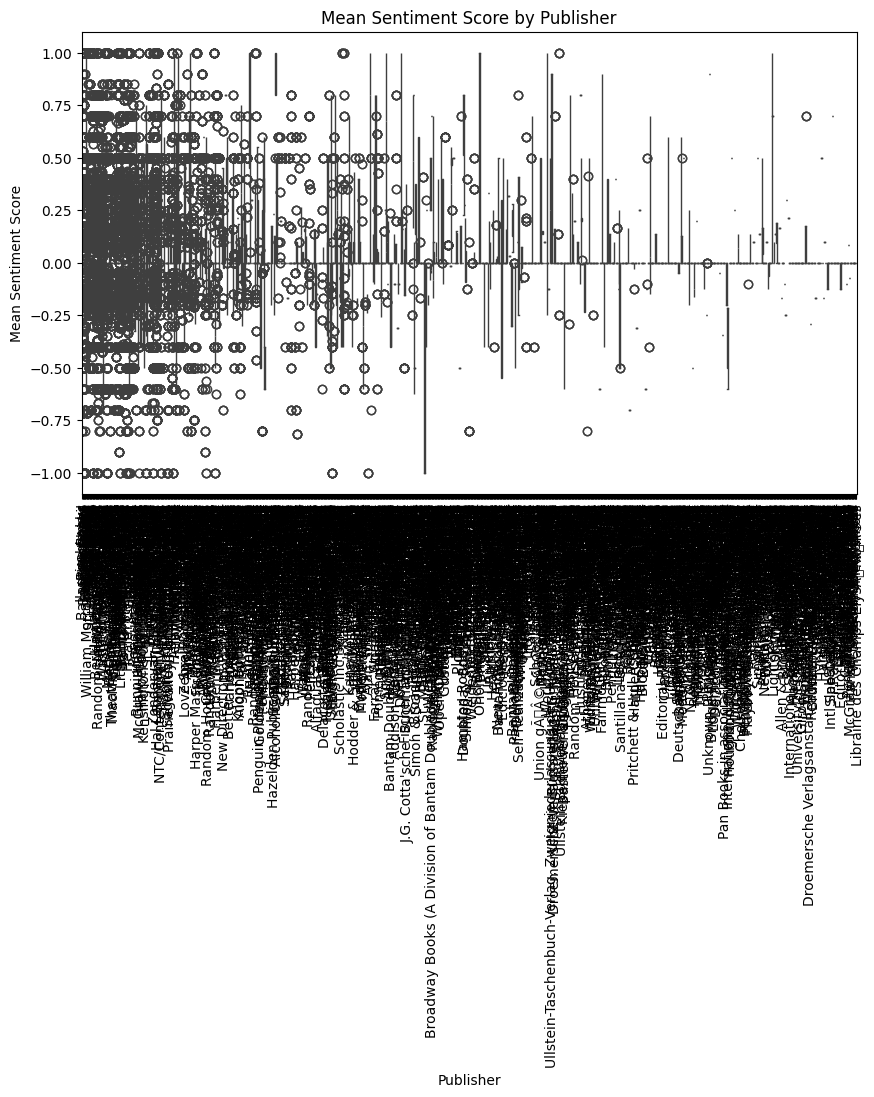

In [ ]:
publisher_sentiment_mean = filtered_df.groupby('Book-Publisher')['TextBlob-Sentiment'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Book-Publisher', y='TextBlob-Sentiment')
plt.xticks(rotation=90)
plt.xlabel('Publisher')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score by Publisher')
plt.show()

<ipython-input-16-7a39dea689f2>:10: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.tight_layout()
<ipython-input-16-7a39dea689f2>:10: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


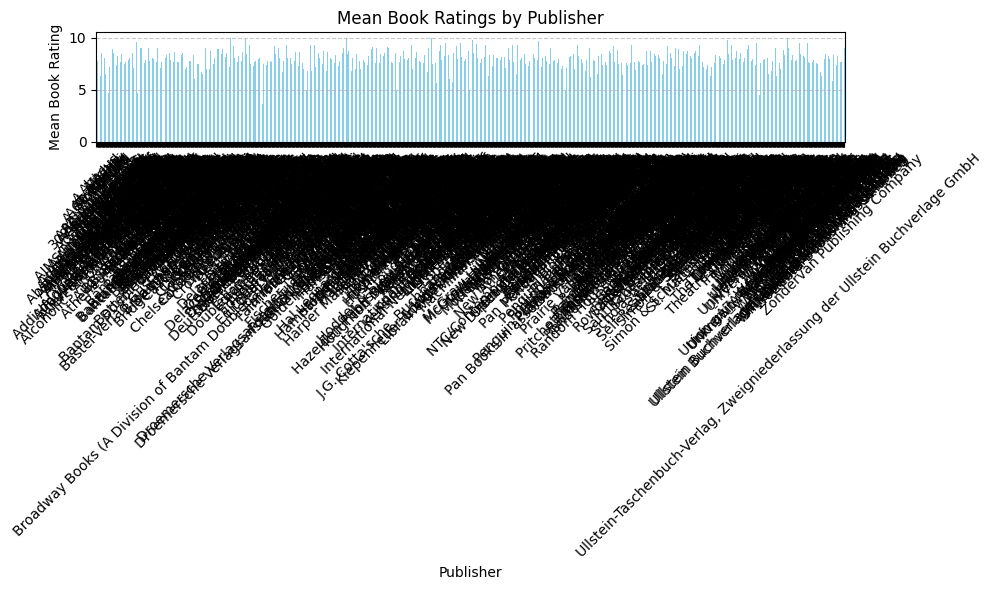

In [ ]:
mean_ratings = filtered_df.groupby('Book-Publisher')['Book-Rating'].mean()

plt.figure(figsize=(10, 6))
mean_ratings.plot(kind='bar', color='skyblue')
plt.title('Mean Book Ratings by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Mean Book Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

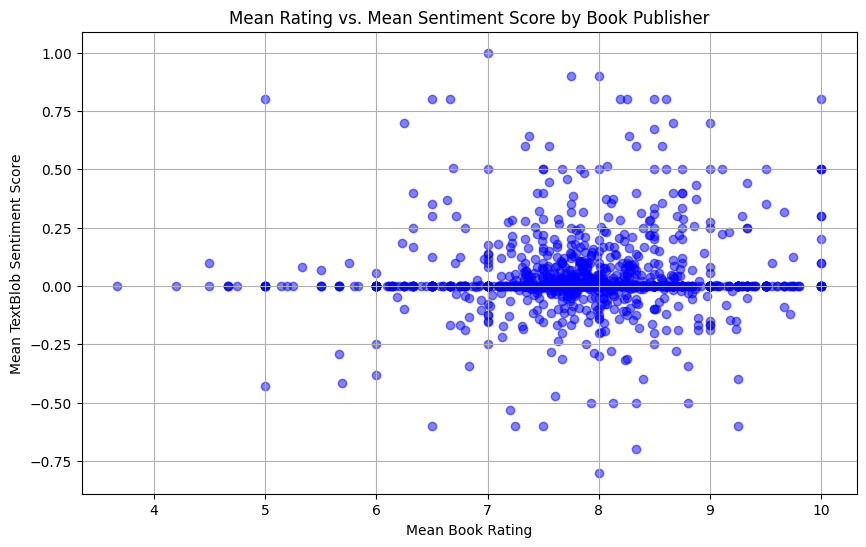

In [ ]:
# Calculate mean book rating and mean sentiment score for each book publisher
grouped_df = filtered_df.groupby('Book-Publisher').agg({
    'Book-Rating': 'mean',
    'TextBlob-Sentiment': 'mean'
}).reset_index()

grouped_df.columns = ['Book_Publisher', 'Mean-Book-Rating', 'Mean-TextBlob-Sentiment']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['Mean-Book-Rating'], grouped_df['Mean-TextBlob-Sentiment'], color='blue', alpha=0.5)
plt.title('Mean Rating vs. Mean Sentiment Score by Book Publisher')
plt.xlabel('Mean Book Rating')
plt.ylabel('Mean TextBlob Sentiment Score')

# Add labels for each point
#for i, txt in enumerate(grouped_df['Book_Publisher']):
#    plt.annotate(txt, (grouped_df['Mean-Book-Rating'][i], grouped_df['Mean-TextBlob-Sentiment'][i]))

plt.grid(True)
plt.show()

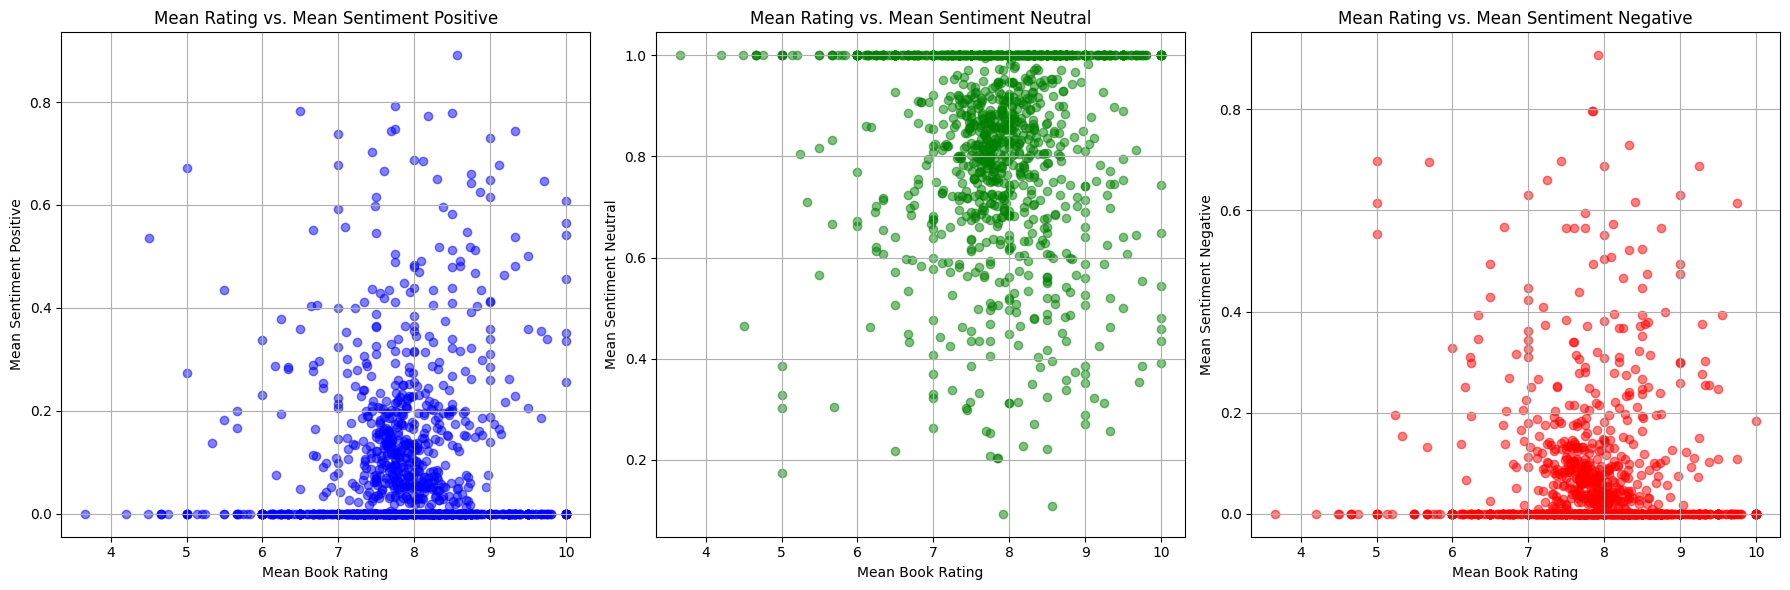

In [ ]:
# Calculate mean book rating and mean sentiment score for each book publisher
grouped_df = filtered_df.groupby('Book-Publisher').agg({
    'Book-Rating': 'mean',
    'Sentiment-Positive': 'mean',
    'Sentiment-Neutral': 'mean',
    'Sentiment-Negative': 'mean'
}).reset_index()

grouped_df.columns = ['Book_Publisher', 'Mean_Book_Rating', 'Mean_Sentiment_Positive', 'Mean_Sentiment_Neutral', 'Mean_Sentiment_Negative']

plt.figure(figsize=(18, 6))

# Plot for mean sentiment positive
plt.subplot(1, 3, 1)
plt.scatter(grouped_df['Mean_Book_Rating'], grouped_df['Mean_Sentiment_Positive'], color='blue', alpha=0.5)
plt.title('Mean Rating vs. Mean Sentiment Positive')
plt.xlabel('Mean Book Rating')
plt.ylabel('Mean Sentiment Positive')
plt.grid(True)

# Plot for mean sentiment neutral
plt.subplot(1, 3, 2)
plt.scatter(grouped_df['Mean_Book_Rating'], grouped_df['Mean_Sentiment_Neutral'], color='green', alpha=0.5)
plt.title('Mean Rating vs. Mean Sentiment Neutral')
plt.xlabel('Mean Book Rating')
plt.ylabel('Mean Sentiment Neutral')
plt.grid(True)

# Plot for mean sentiment negative
plt.subplot(1, 3, 3)
plt.scatter(grouped_df['Mean_Book_Rating'], grouped_df['Mean_Sentiment_Negative'], color='red', alpha=0.5)
plt.title('Mean Rating vs. Mean Sentiment Negative')
plt.xlabel('Mean Book Rating')
plt.ylabel('Mean Sentiment Negative')
plt.grid(True)

plt.tight_layout()
plt.show()

Age vs Sentiment Score () - define it by children vs young adult vs adult vs elderly

Location vs Publisher - compare if specific locaitons, i.e languages, use specific publishers

Age vs Year of Publicaiton (vs potentially sentiment score)

Age vs Publisher

potentially, book publishers that are read by all age ranges indiscrimnantly are more likely to be non fiction and vice versa. Using the sentiment score and that idea, we can check to see if its more likely to be non-fiction/fiction.

# Sentiment rating vs Age Group

<ipython-input-19-e179a547d6a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age-Range'] = filtered_df['User-Age'].apply(categorize_age)


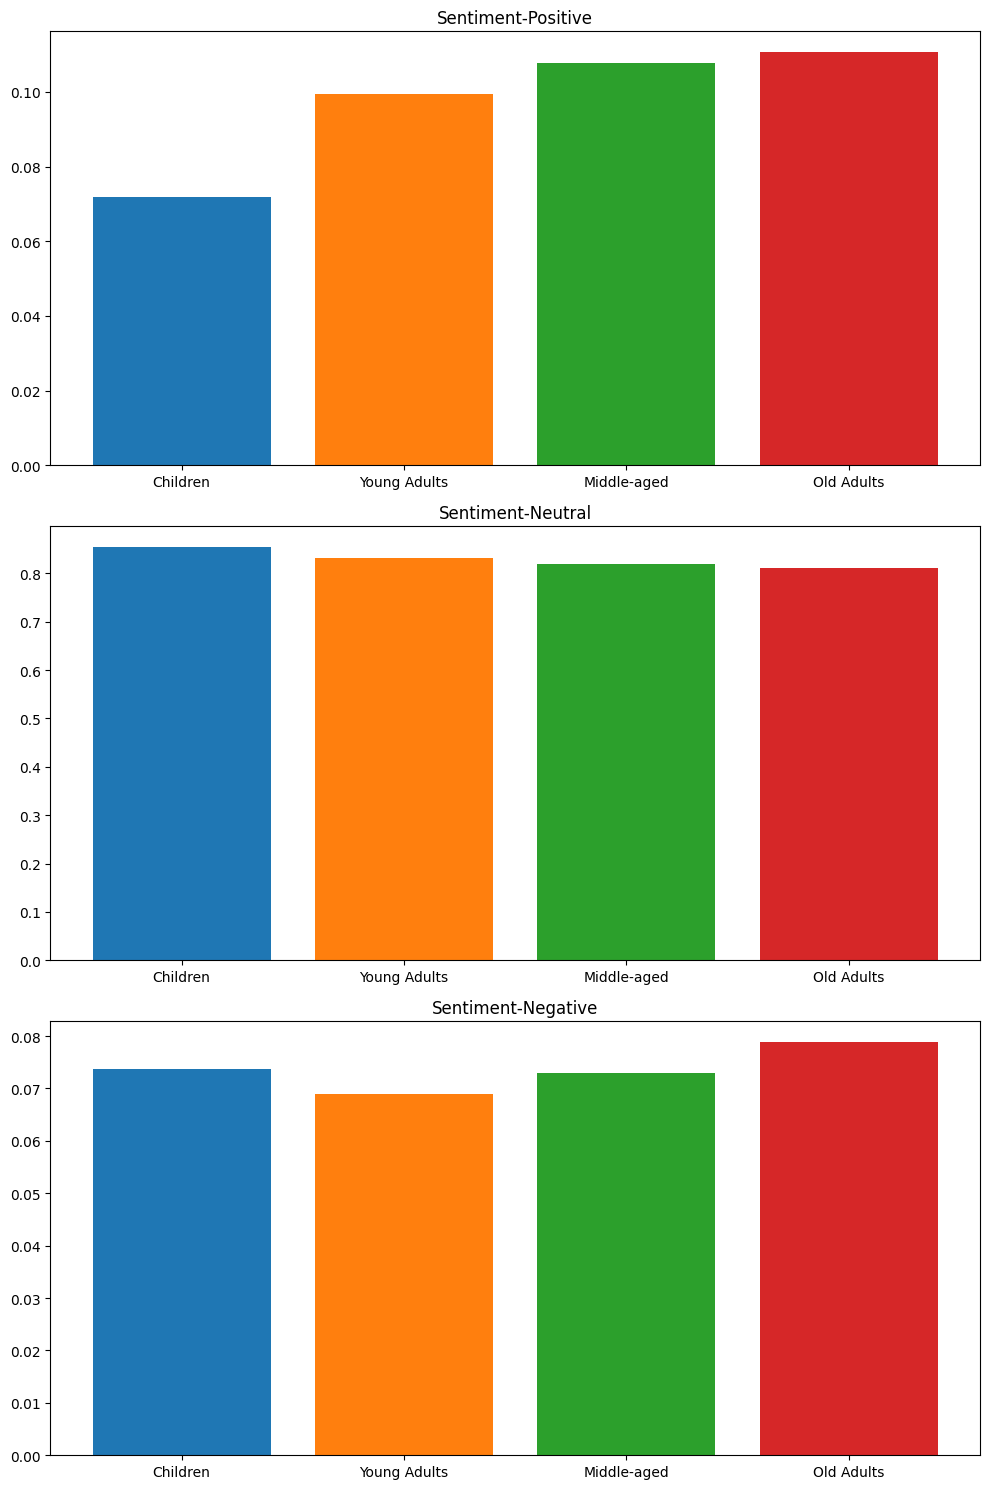

In [ ]:
def categorize_age(age):
    if 3 <= age <= 16:
        return 'Children'
    elif 17 <= age <= 30:
        return 'Young Adults'
    elif 31 <= age <= 45:
        return 'Middle-aged'
    else:
        return 'Old Adults'

filtered_df['Age-Range'] = filtered_df['User-Age'].apply(categorize_age)

age_range_order = ['Children', 'Young Adults', 'Middle-aged', 'Old Adults']
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sentiment_columns = ['Sentiment-Positive', 'Sentiment-Neutral', 'Sentiment-Negative']
for i, sentiment_col in enumerate(sentiment_columns):
    ax = axes[i]
    ax.set_title(sentiment_col)
    for age_range in age_range_order:
        group_df = filtered_df[filtered_df['Age-Range'] == age_range]
        ax.bar(age_range, group_df[sentiment_col].mean())

plt.tight_layout()
plt.show()

# Book-Publisher Grouping

In [ ]:
grouped = filtered_df.groupby('Book-Publisher')

average_user_age = grouped['User-Age'].mean()
average_year_of_publication = grouped['Year-Of-Publication'].mean()
most_popular_country = grouped['User-Country'].agg(lambda x: x.value_counts().index[0])
sentiment_counts = grouped[['Sentiment-Positive', 'Sentiment-Negative', 'Sentiment-Neutral']].sum()
most_frequent_sentiment = sentiment_counts.idxmax(axis=1)

publisher_df = pd.DataFrame({
    'Average User-Age': average_user_age,
    'Average Year-Of-Publication': average_year_of_publication,
    'Most Popular Country': most_popular_country,
    'Sentiment': most_frequent_sentiment
}).reset_index()

print(publisher_df)

                    Book-Publisher  Average User-Age  \
0                300incredible.com              37.0   
1                        A. Michel            38.875   
2                     A. Mondadori         30.736842   
3                      ACE Charter         33.564576   
4         AIMS International Books         26.222222   
...                            ...               ...   
1307                     Zondervan         34.111111   
1308  Zondervan Publishing Company         37.790123   
1309           Zumaya Publications             34.25   
1310                           btb         34.796875   
1311                    eReads.com              40.5   

      Average Year-Of-Publication Most Popular Country          Sentiment  
0                     2000.000000                  usa  Sentiment-Neutral  
1                     1994.500000               france  Sentiment-Neutral  
2                     1992.473684                italy  Sentiment-Neutral  
3                     1

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0           usa
1        france
2         italy
3           usa
4         spain
         ...   
1307        usa
1308        usa
1309        usa
1310    germany
1311     canada
Name: Most Popular Country, Length: 1312, dtype: object

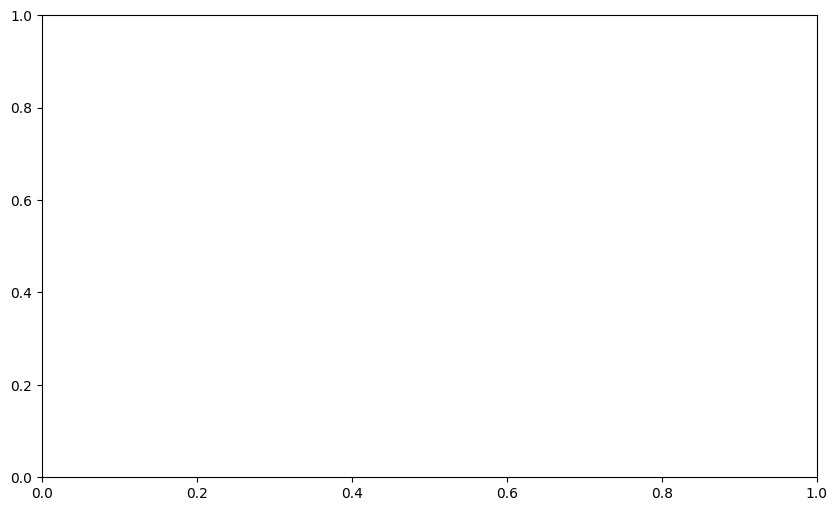

In [ ]:
publisher_df['Most Popular Country'] = publisher_df['Most Popular Country'].str.strip()


plt.figure(figsize=(10, 6))

plt.scatter(
    publisher_df['Average User-Age'],
    publisher_df['Average Year-Of-Publication'],
    c=publisher_df['Most Popular Country'],
    cmap='tab10',
    alpha=0.8,
    s=100,
    edgecolors='w',
)


plt.xlabel('Average User Age')
plt.ylabel('Average Year of Publication')
plt.title('Average User Age vs Average Year of Publication (Colored by Most Popular Country)')


cbar = plt.colorbar()
cbar.set_label('Most Popular Country')

plt.grid(True)
plt.tight_layout()
plt.show()